# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer, MissingIndicator

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go
import cufflinks as cf

In [2]:
sns.set(style="darkgrid")

#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

# Load Data

In [3]:
raw_df = pd.read_csv('../datasets/cs-training.csv', index_col=0)

# Preparation

## Column Names

In [4]:
def CorrectColumnsLabels(dataframe):
    dataframe[['TARGET', 'CRED_UTIL', 'AGE', 'SHORT_DUE', 'DEBT_RATIO', 'INCOME',
    'CRED_LINES', 'QTD_LONG_DUE', 'ESTATE_LINES', 'MID_DUE', 'DEPENDENTS']] = dataframe
    dataframe = dataframe[['TARGET', 'CRED_UTIL', 'AGE', 'SHORT_DUE', 'DEBT_RATIO', 'INCOME',
    'CRED_LINES', 'QTD_LONG_DUE', 'ESTATE_LINES', 'MID_DUE', 'DEPENDENTS']]
    return dataframe

df = CorrectColumnsLabels(raw_df.copy())

In [5]:
df.describe()

,TARGET,CRED_UTIL,AGE,SHORT_DUE,DEBT_RATIO,INCOME,CRED_LINES,QTD_LONG_DUE,ESTATE_LINES,MID_DUE,DEPENDENTS
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Missing Data

In [6]:
def check_missing(dataframe):
    count = dataframe.isnull().sum().sort_values(ascending=False)
    percentage = ((dataframe.isnull().sum()/len(dataframe)*100)).sort_values(ascending=False)

    missing = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])

    missing_fts = missing[missing['Percentage']>0]
    print(f'It was found {len(missing_fts)} features with missing values','\n')

    print('Count and percentage of missing values:')
    return missing.head(len(missing_fts))

In [7]:
# Checking missing values
check_missing(df)

It was found 2 features with missing values 

Count and percentage of missing values:


,Count,Percentage
INCOME,29731,19.820667
DEPENDENTS,3924,2.616000


In [33]:
def check_duplicate(dataframe):
    columns = [col for col in dataframe.columns]
    print(f'There is {dataframe[dataframe.duplicated(subset = columns)].shape[0]} duplicate rows')

In [34]:
# Checking duplicate data
check_duplicate(df)

There is 609 duplicate rows


## Types

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TARGET        150000 non-null  int64  
 1   CRED_UTIL     150000 non-null  float64
 2   AGE           150000 non-null  int64  
 3   SHORT_DUE     150000 non-null  int64  
 4   DEBT_RATIO    150000 non-null  float64
 5   INCOME        120269 non-null  float64
 6   CRED_LINES    150000 non-null  int64  
 7   QTD_LONG_DUE  150000 non-null  int64  
 8   ESTATE_LINES  150000 non-null  int64  
 9   MID_DUE       150000 non-null  int64  
 10  DEPENDENTS    146076 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


# Target Distribution

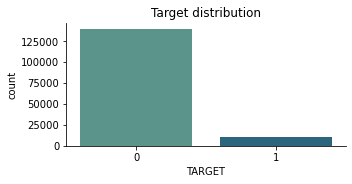

In [36]:
f = sns.catplot(x="TARGET", kind="count", palette="crest", data=df)
f.fig.set_size_inches(5,2)
plt.title('Target distribution')
plt.show()

# Correlation

TARGET          1.000000
SHORT_DUE       0.125587
QTD_LONG_DUE    0.117175
MID_DUE         0.102261
DEPENDENTS      0.046048
CRED_UTIL      -0.001802
ESTATE_LINES   -0.007038
DEBT_RATIO     -0.007602
INCOME         -0.019746
CRED_LINES     -0.029669
AGE            -0.115386
Name: TARGET, dtype: float64

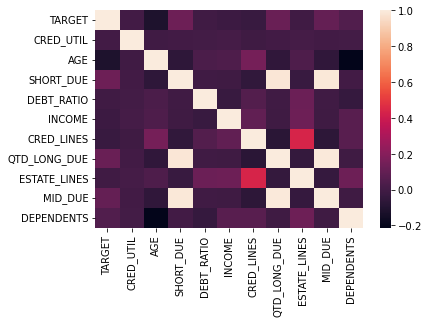

In [37]:
corr = df.corr()
sns.heatmap(corr)

corr['TARGET'].sort_values(ascending=False)

# Features Distribution

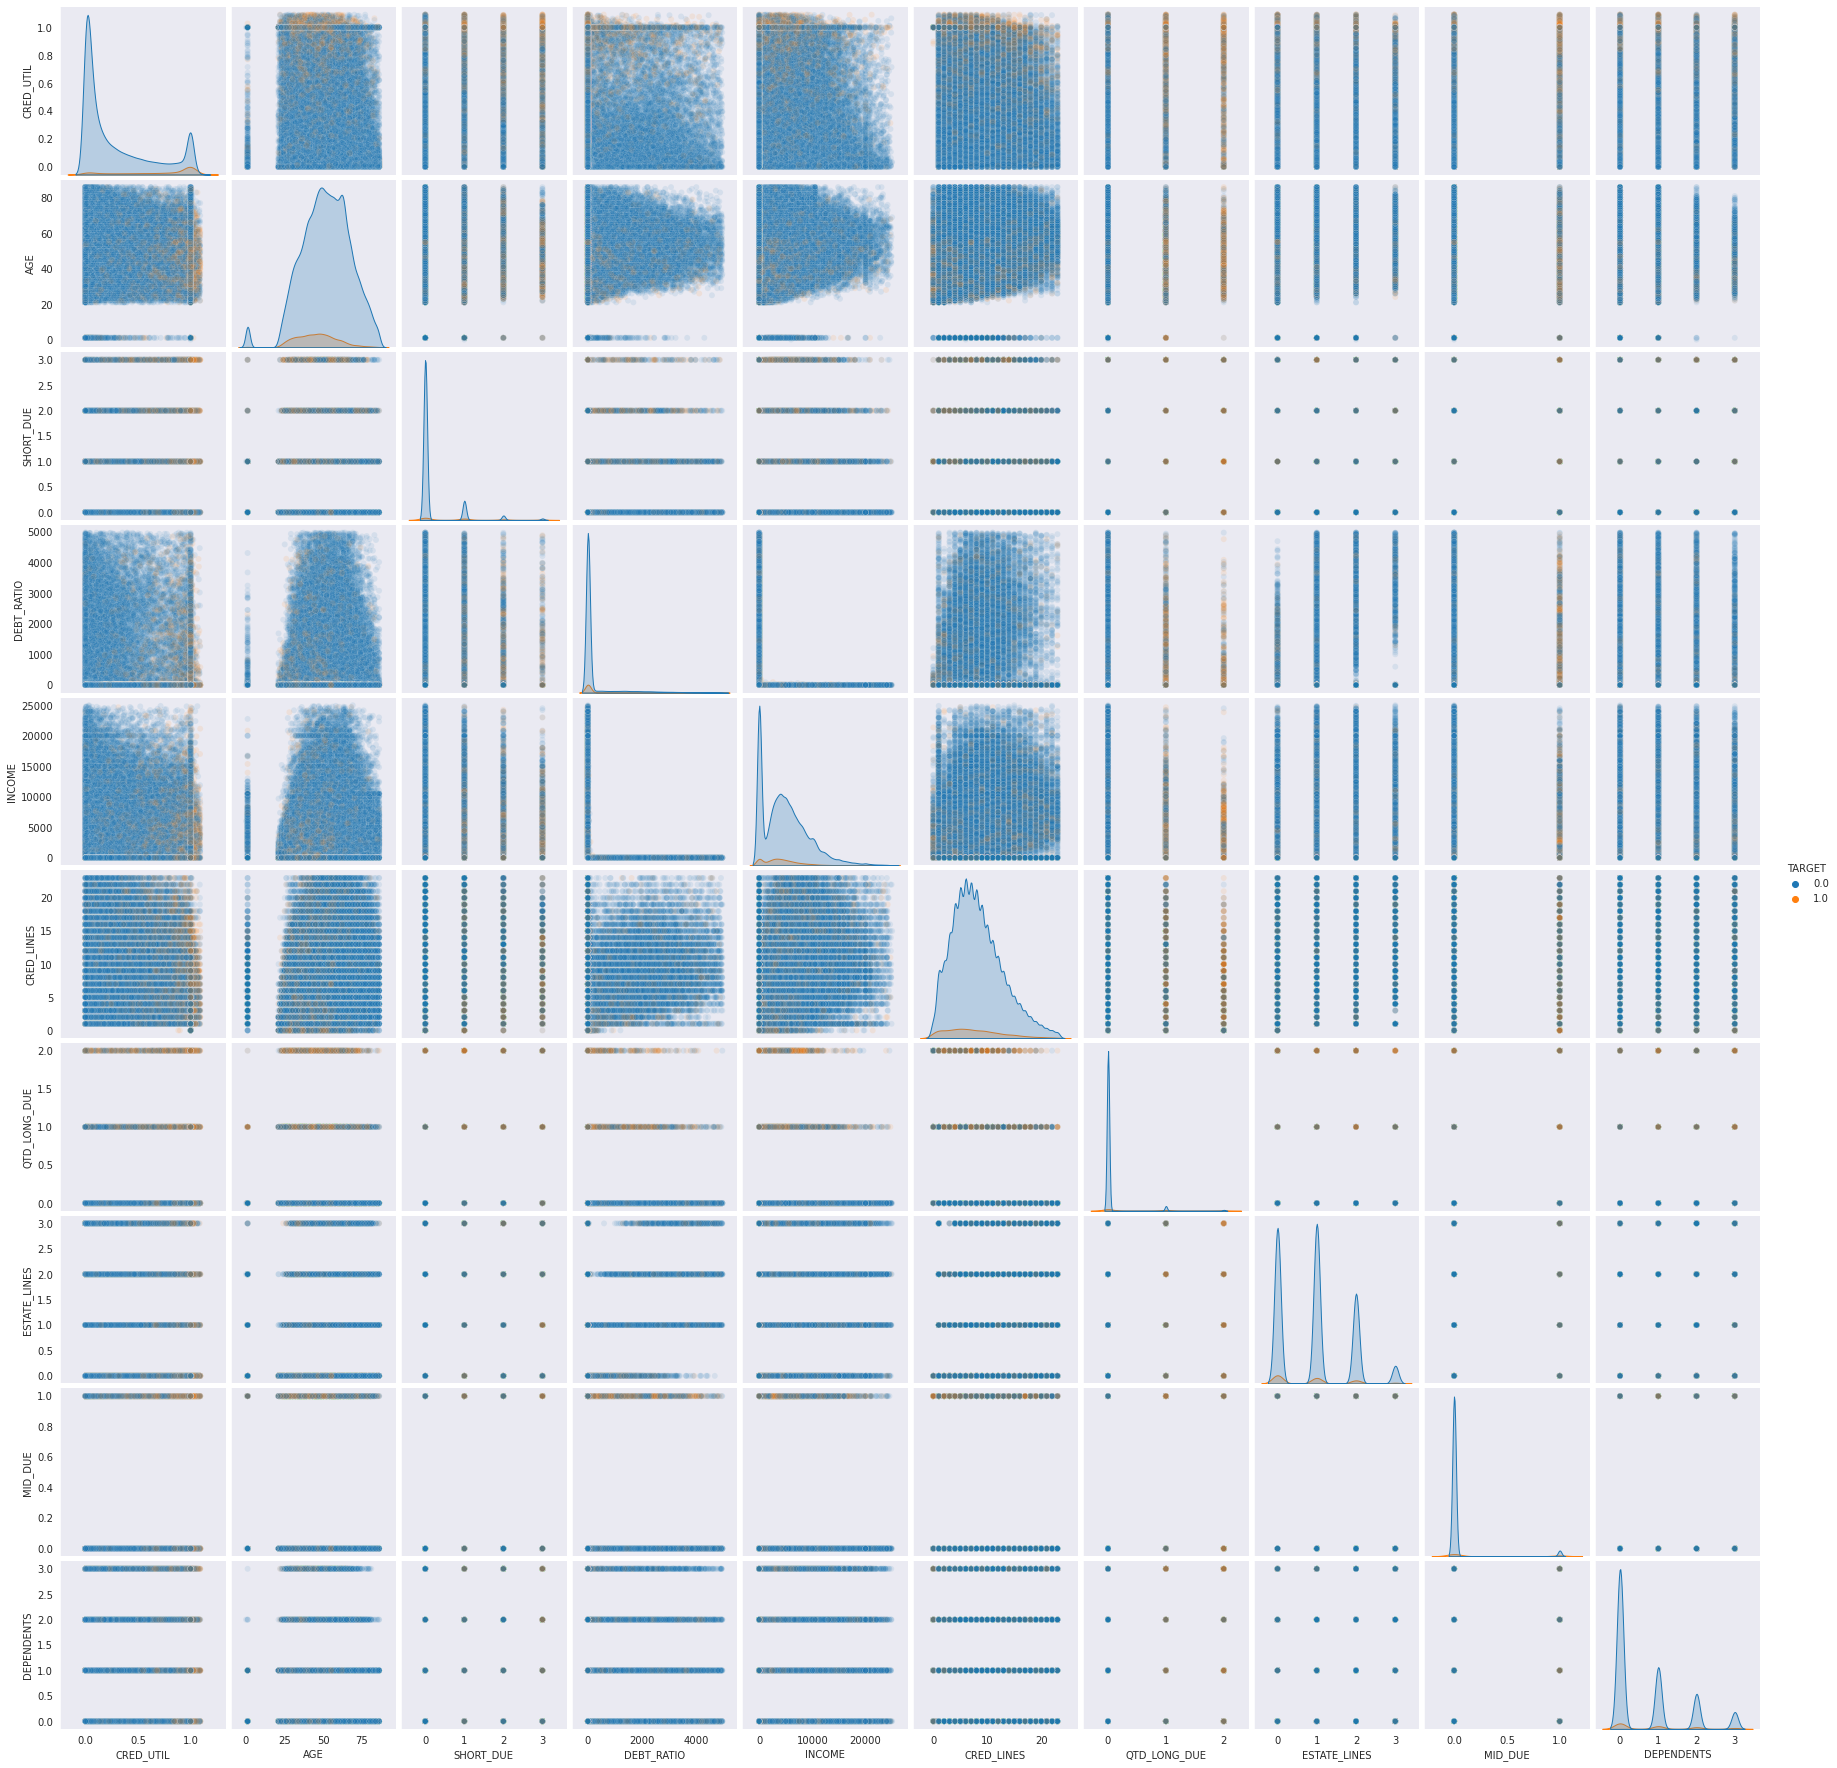

In [130]:
sns.pairplot(data=df[df < df.quantile(0.99)].fillna(1), hue="TARGET", plot_kws={'alpha':0.1})

## General Features

In [118]:
gen_df = df[['AGE','DEPENDENTS', 'TARGET']]

i, col in enumerate(gen_df.columns.to_list()[:-1])

(2, False)

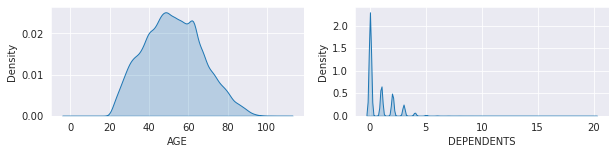

In [121]:
ax1 = sns.set_style(style="darkgrid")
fig, axs = plt.subplots(figsize=(10,2),ncols=2)
sns.kdeplot(gen_ft['AGE'], shade=True, ax=axs[0])
sns.kdeplot(gen_ft['DEPENDENTS'], shade=True, ax=axs[1])
plt.show()

### Age

In [57]:
def segment_plot(dataframe, bins, labels, feature, target, plus_label, xlabel, palette="Blues_d"):
    
    dataframe[f'{feature}_GROUP'] = pd.cut(dataframe[feature],
                            bins=bins,
                            labels=labels,
                            right=False)
    
    dataframe[f'{feature}_GROUP'] = dataframe[f'{feature}_GROUP'].cat.add_categories(plus_label).fillna(plus_label)
    
    group_df = pd.DataFrame(dataframe
                         .groupby(f'{feature}_GROUP').sum()[target]/
                         dataframe.groupby(f'{feature}_GROUP').count()[target]).rename(columns={target: 'PCT_DELIQ'})
    group_df['COUNT'] = dataframe.groupby(f'{feature}_GROUP').count()[target]
    group_df = group_df.reset_index()
    
    
    ax1 = sns.set_style(style="dark", rc=None )
    fig, ax1 = plt.subplots(figsize=(7,3))

    sns.barplot(data = group_df, x=f"{feature}_GROUP", y='COUNT', palette=palette, alpha=0.8, ax=ax1)
    ax1.set_ylabel('# of borrowers')
    ax1.set_xlabel(xlabel)
    
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(3))
    ticks_loc = ax1.get_yticks().tolist()
    ax1.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax1.set_yticklabels([f'{x/1000}k'.format(x) for x in ticks_loc])

    ax2 = ax1.twinx()
    group_df.head()
    
    sns.lineplot(x=f"{feature}_GROUP", y="PCT_DELIQ", data=group_df, marker='o', color='k', ax = ax2,label='Due Deliquency')
    
    ax2.yaxis.set_major_locator(mticker.MaxNLocator(3))
    ticks_loc = ax2.get_yticks().tolist()
    ax2.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in ticks_loc])
    
    ax2.set_ylabel('% due deliquency')
    plt.legend(loc='best')
    plt.show()

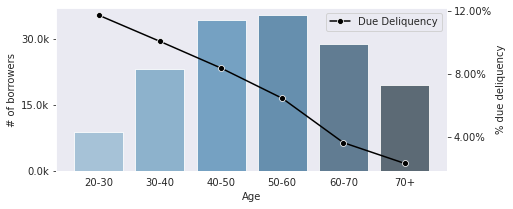

In [58]:
segment_plot(gen_df, bins=[20, 30, 40, 50, 60, 70],
             labels=['20-30', '30-40', '40-50', '50-60','60-70'],
             feature='AGE', target='TARGET',
             plus_label='70+',  xlabel='Age', palette="Blues_d")

### Dependents

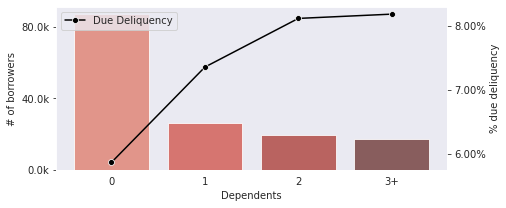

In [62]:
segment_plot(gen_df, bins=[0, 1, 2, 3], labels=['0', '1', '2'], feature='DEPENDENTS', target='TARGET',
             plus_label='3+',  xlabel='Dependents', palette="Reds_d")

## Monetary Features

In [97]:
mon_df = df[['INCOME', 'CRED_UTIL', 'DEBT_RATIO', 'CRED_LINES', 'ESTATE_LINES','TARGET']]

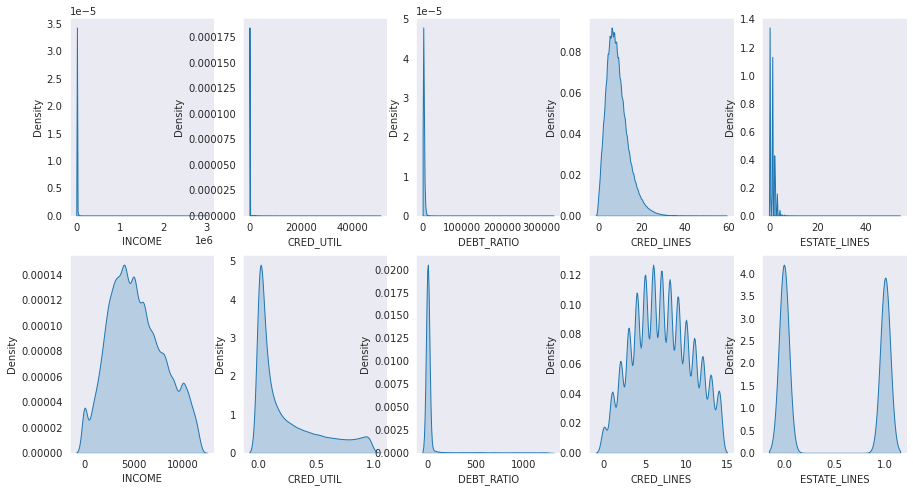

In [104]:
fig, axs = plt.subplots(nrows = 2, ncols=5,figsize=(15,8))

for i, col in enumerate(mon_df.columns.to_list()[:-1]):
    sns.kdeplot(df[col], shade=True, ax=axs[0,i])
    
for i, col in enumerate(mon_df.columns.to_list()[:-1]):
    sns.kdeplot(df[df[col] < df[col].quantile(0.9)][col], shade=True, ax=axs[1,i])

plt.show()

In [433]:
mon_df.describe()

,INCOME,CRED_UTIL,DEBT_RATIO,CRED_LINES,ESTATE_LINES,TARGET
count,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,6.418455e+03,6.048438,353.005076,8.452760,1.018240,0.066840
std,1.289040e+04,249.755371,2037.818523,5.145951,1.129771,0.249746
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.903000e+03,0.029867,0.175074,5.000000,0.000000,0.000000
50%,5.400000e+03,0.154181,0.366508,8.000000,1.000000,0.000000
75%,7.400000e+03,0.559046,0.868254,11.000000,2.000000,0.000000
max,3.008750e+06,50708.000000,329664.000000,58.000000,54.000000,1.000000


### Income

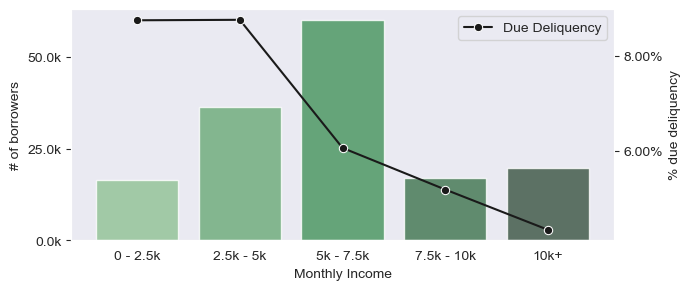

In [437]:
segment_plot(mon_df, bins=[0, 2500, 5000, 7500, 10000], labels=['0 - 2.5k', '2.5k - 5k', '5k - 7.5k', '7.5k - 10k'],
             feature='INCOME', target='TARGET', plus_label='10k+',
             xlabel='Monthly Income', palette="Greens_d")

### Estate and Credit Lines 

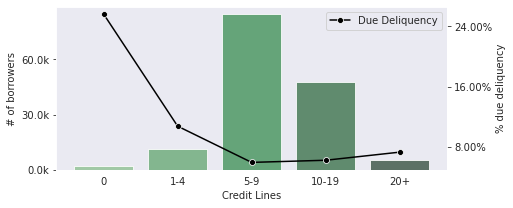

In [76]:
segment_plot(mon_df, bins=[0, 1, 3, 10, 20], labels=['0', '1-4','5-9', '10-19'], feature='CRED_LINES', target='TARGET',
             plus_label='20+',  xlabel='Credit Lines', palette="Greens_d")

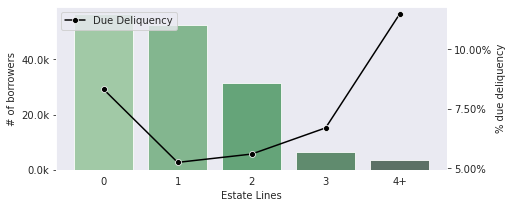

In [78]:
segment_plot(mon_df, bins=[0, 1, 2, 3, 4], labels=['0', '1','2','3'], feature='ESTATE_LINES', target='TARGET',
             plus_label='4+',  xlabel='Estate Lines', palette="Greens_d")

### Credit Utilization and Debt Ratio

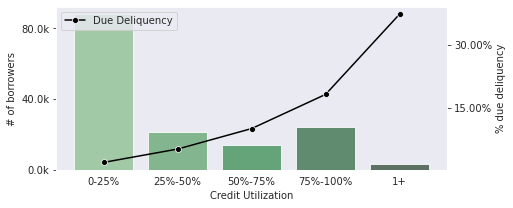

In [124]:
segment_plot(mon_df, bins=[0, 0.25, 0.5, 0.75, 1], labels=['0-25%', '25%-50%', '50%-75%', '75%-100%'],
             feature='CRED_UTIL', target='TARGET', plus_label='1+',
             xlabel='Credit Utilization', palette="Greens_d")

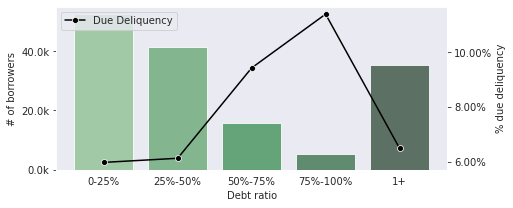

In [126]:
segment_plot(mon_df, bins=[0, 0.25, 0.5, 0.75, 1], labels=['0-25%', '25%-50%', '50%-75%', '75%-100%'],
             feature='DEBT_RATIO', target='TARGET', plus_label='1+',
             xlabel='Debt ratio', palette="Greens_d")

# Feature Engineering

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Dependents Imputation (Most-frequent)
imp = SimpleImputer(strategy="most_frequent")
df['DEPENDENTS'] = imp.fit_transform(df[['DEPENDENTS']])

In [ ]:
# Income Missing Flag
indicator = MissingIndicator()
df['MISS_INCOME'] = indicator.fit_transform(df[['INCOME']])

# Income Imputation (Median)
imp = SimpleImputer(strategy='median')
df['INCOME'] = imp.fit_transform(df[['INCOME']])

In [218]:
df['DEPENDENTS_RATIO'] = df['DEPENDENTS']/df['AGE']

In [247]:
df[['AGE','DEPENDENTS','DEPENDENTS_RATIO','TARGET']].corr()

,AGE,DEPENDENTS,DEPENDENTS_RATIO,TARGET
AGE,1.000000,-0.217475,-0.300713,-0.115569
DEPENDENTS,-0.217475,1.000000,0.972153,0.046461
DEPENDENTS_RATIO,-0.300713,0.972153,1.000000,0.061090
TARGET,-0.115569,0.046461,0.061090,1.000000
